In [99]:
import pandas as pd
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from statsmodels.stats.diagnostic import linear_rainbow
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score, mean_absolute_error

In [66]:
#Loading the data set
data = pd.read_csv("tips (data for regression problem).csv")
data.head(10)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
5,25.29,4.71,Male,No,Sun,Dinner,4
6,8.77,2.00,Male,No,Sun,Dinner,2
7,26.88,3.12,Male,No,Sun,Dinner,4
8,15.04,1.96,Male,No,Sun,Dinner,2
9,14.78,3.23,Male,No,Sun,Dinner,2


In [68]:
# Display basic information about the data-set
print("Data overview:")
data.info()

Data overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


In [70]:
data.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [72]:
#Encode catagorical features
data_encoded = data.copy()
label_encoders = {}

for column in ['sex', 'smoker', 'day', 'time']:
    le = LabelEncoder()
    data_encoded[column] = le.fit_transform(data[column])
    label_encoders[column] = le  # Save the encoder for each column

In [74]:
# Display the first few rows of the Encoded data
print("Encoded data sample:")
data_encoded.head()

Encoded data sample:


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,0,0,2,0,2
1,10.34,1.66,1,0,2,0,3
2,21.01,3.50,1,0,2,0,3
3,23.68,3.31,1,0,2,0,2
4,24.59,3.61,0,0,2,0,4


In [76]:
# Calculate and display the correlation matrix
correlation_matrix = data_encoded.corr()
print("Correlation Matrix:")
correlation_matrix

Correlation Matrix:


,total_bill,tip,sex,smoker,day,time,size
total_bill,1.000000,0.675734,0.144877,0.085721,-0.043550,-0.183118,0.598315
tip,0.675734,1.000000,0.088862,0.005929,-0.011548,-0.121629,0.489299
sex,0.144877,0.088862,1.000000,0.002816,-0.078292,-0.205231,0.086195
smoker,0.085721,0.005929,0.002816,1.000000,-0.282721,-0.054921,-0.133178
day,-0.043550,-0.011548,-0.078292,-0.282721,1.000000,0.638019,0.069510
time,-0.183118,-0.121629,-0.205231,-0.054921,0.638019,1.000000,-0.103411
size,0.598315,0.489299,0.086195,-0.133178,0.069510,-0.103411,1.000000


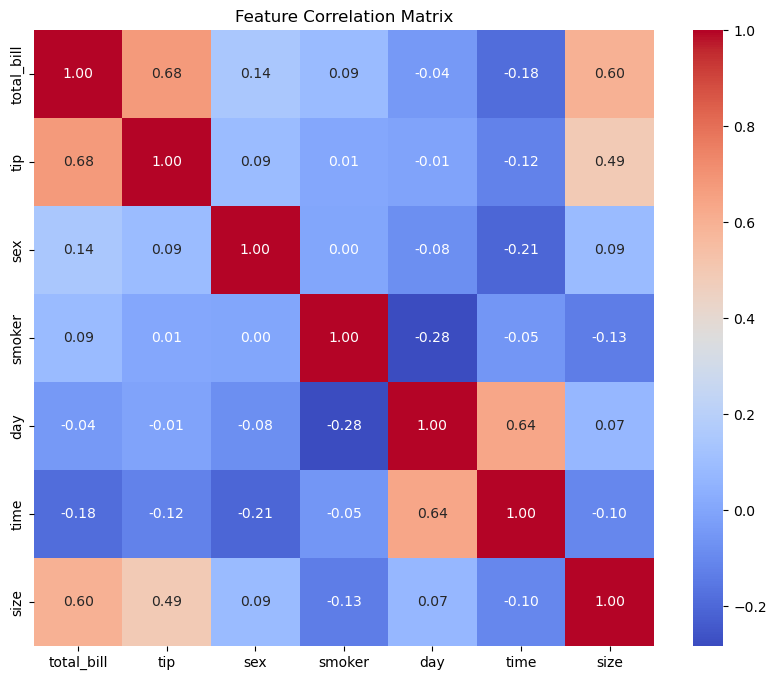

In [78]:
# Visualize correlations with a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Matrix")
plt.show()

In [80]:
# Extract correlations with the 'tip' column to see which factors impact tip amounts
correlation_with_tip = correlation_matrix['tip'].sort_values(ascending=False)
print("Correlation of Features with Tip Amount:")
print(correlation_with_tip)


Correlation of Features with Tip Amount:
tip           1.000000
total_bill    0.675734
size          0.489299
sex           0.088862
smoker        0.005929
day          -0.011548
time         -0.121629
Name: tip, dtype: float64


In [86]:
# Split the data into features and target
X = data_encoded.drop(columns='tip')
y = data_encoded['tip']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the data for models that require it
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the regression models
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Support Vector Regression": SVR(),
    "K-Nearest Neighbors": KNeighborsRegressor()
}

# Dictionary to store model evaluation results
results = {}

# Train and evaluate each model
for name, model in models.items():
    # Use scaled data for SVR and KNN
    if name in ["Support Vector Regression", "K-Nearest Neighbors"]:
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
    
    # Calculate R2 Score and Mean Absolute Error (MAE)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    results[name] = {"R2 Score": r2, "Mean Absolute Error": mae}

# Convert results to a DataFrame for easy viewing
results_df = pd.DataFrame(results).T
results_df.sort_values(by="R2 Score", ascending=False, inplace=True)

# Display the evaluation results
print("Model Performance:")
results_df


Model Performance:


,R2 Score,Mean Absolute Error
Lasso Regression,0.546712,0.625610
Ridge Regression,0.445788,0.669679
Linear Regression,0.444137,0.670381
Support Vector Regression,0.425867,0.662227
K-Nearest Neighbors,0.352448,0.748571
Random Forest,0.229934,0.775051
Decision Tree,-0.130752,0.922449


## Insights for Management
***Influence of party size and Bill amount***
Total bill amount and the party size are the most prominet factors influencing tip amount. Emphasising this can help management predict the tipping patterns,such as encoureging larger parties or promoting higher spending for a larger tip

***Customer Experience Based on Bill and Size***
Since larger bills and party sizes correlate with higher tips, management can offer enhanced services or incentives to these groups to further boost customer satisfaction and tipping likelihood.

***Potential for Upselling***
Knowing that total bill amount strongly impacts tips, staff can be trained in upselling techniques, subtly encouraging higher spending, especially for groups with larger party sizes.

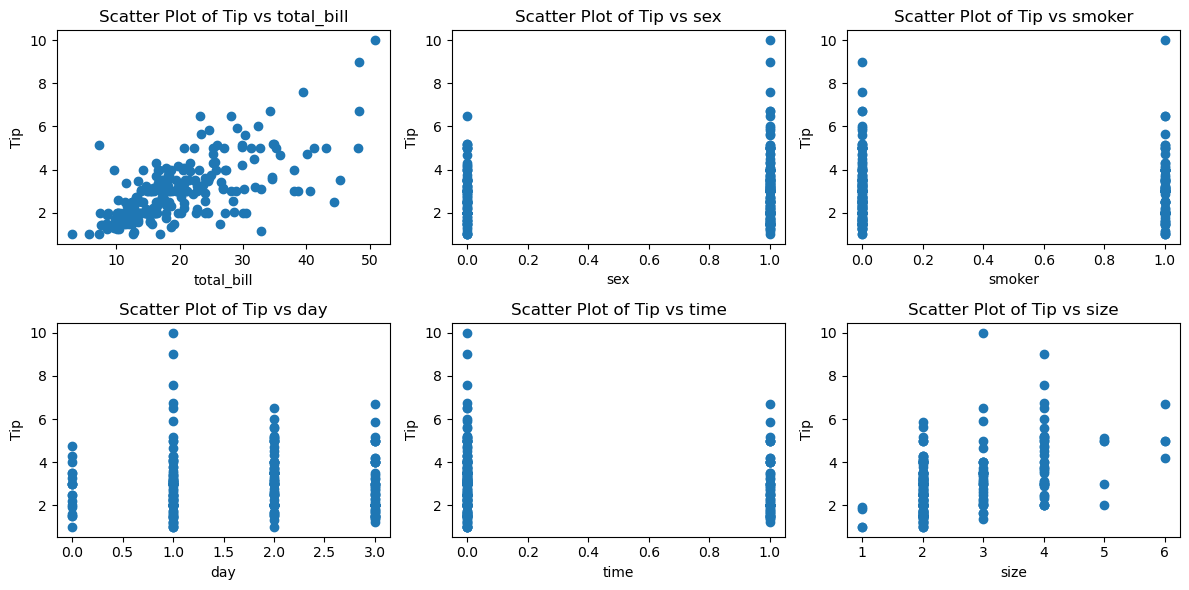

In [89]:
# Scatter Plot to visualize the relationship between each predictor and target
plt.figure(figsize=(12, 6))
for i, column in enumerate(X.columns, 1):
    plt.subplot(2, 3, i)
    plt.scatter(X[column], y)
    plt.xlabel(column)
    plt.ylabel('Tip')
    plt.title(f'Scatter Plot of Tip vs {column}')
plt.tight_layout()
plt.show()


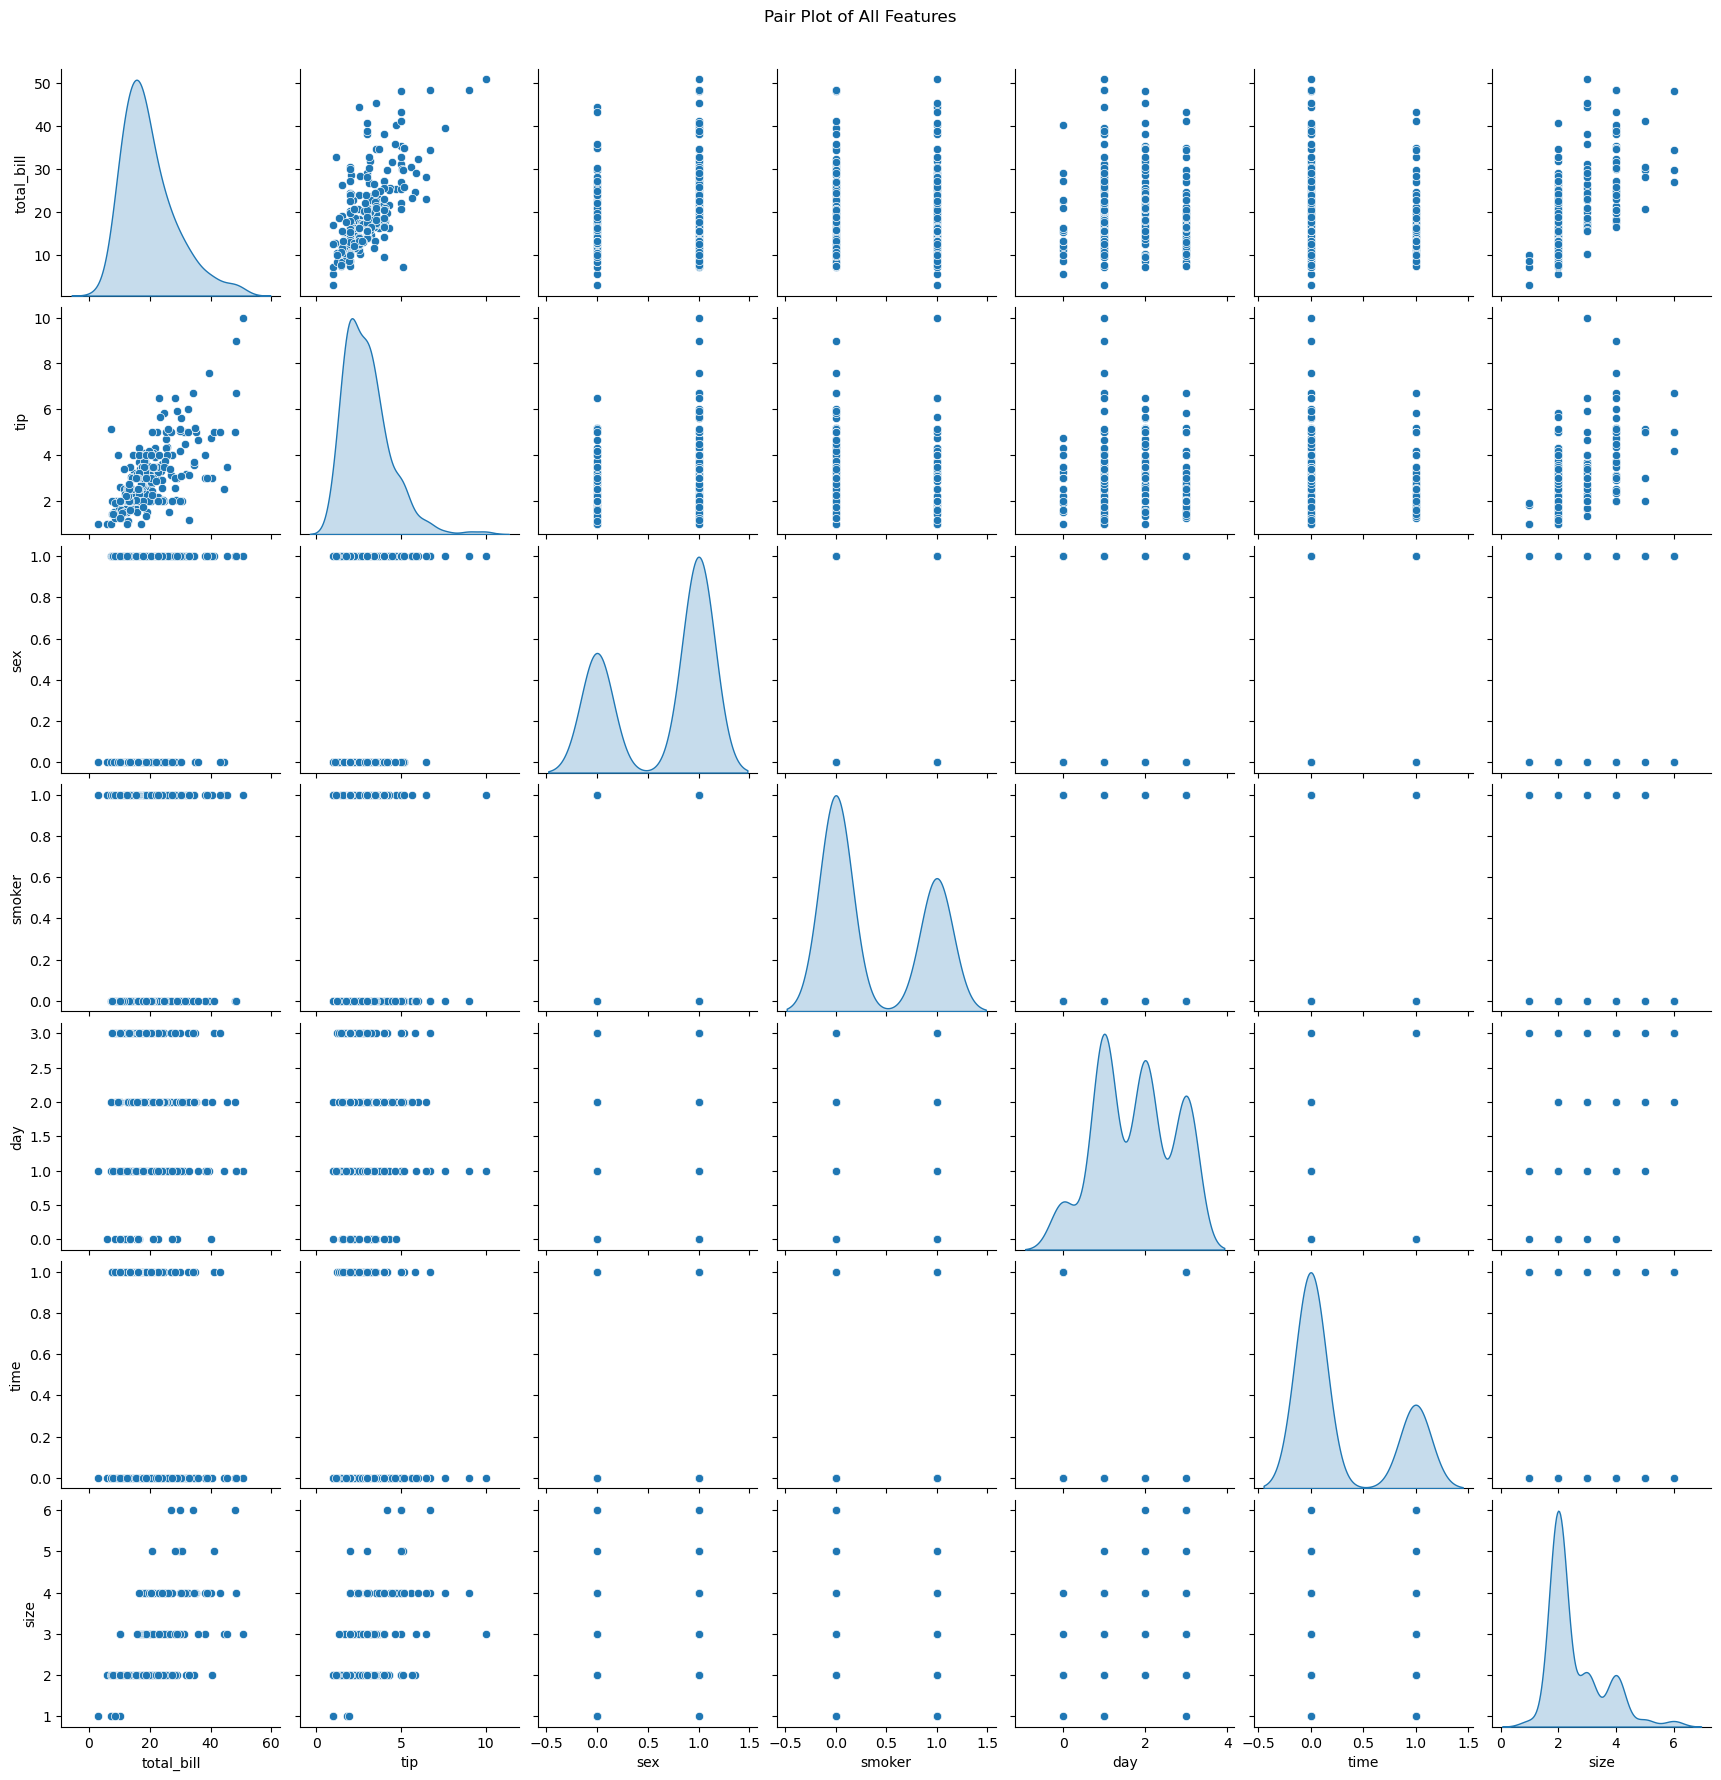

In [91]:
# Pair Plot for Multiple Features
sns.pairplot(data_encoded, diag_kind='kde')
plt.suptitle("Pair Plot of All Features", y=1.02)
plt.show()


In [101]:
# Statistical Tests for Linearity (Rainbow Test)
# Fit a simple linear regression model for the Rainbow test
X_with_const = sm.add_constant(X)  # Add constant term for intercept
model = sm.OLS(y, X_with_const).fit()
rainbow_stat, rainbow_p_val = linear_rainbow(model)
print(f"Rainbow test statistic: {rainbow_stat}, p-value: {rainbow_p_val}")

if rainbow_p_val > 0.05:
    print("Fail to reject the null hypothesis: Linear model is a good fit.")
else:
    print("Reject the null hypothesis: Linear model may not be a good fit.")


Rainbow test statistic: 1.2036274510126597, p-value: 0.15798464222013167
Fail to reject the null hypothesis: Linear model is a good fit.


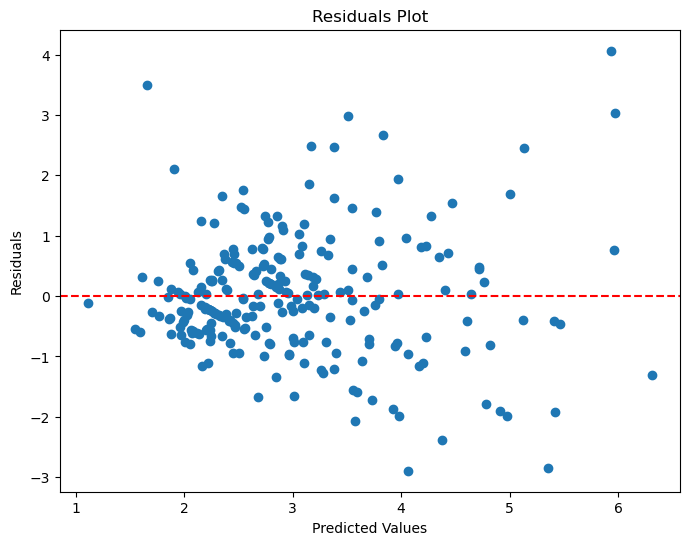

In [103]:
# Residuals Plot to check linearity assumption
y_pred = model.predict(X_with_const)
residuals = y - y_pred
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residuals Plot")
plt.show()